In [1]:
 
!pip install scikit-plot
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline

from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB

import lightgbm as lgb

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split


from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_confusion_matrix


from PIL import Image
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [3]:
df = pd.read_csv("train_set.csv")
test = pd.read_csv('test_set.csv')
df.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


### Text Cleaning
Remove noise

In [4]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['text'] = df['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)


###test
test['text'] = test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### remove punctuation

In [6]:
import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

df['text'] = df['text'].apply(remove_punctuation)
df['text'].iloc[2]


###test
test['text'] = test['text'].apply(remove_punctuation)

In [8]:
df['text'] = df['text'].str.lower()
test['text'] = test['text'].str.lower()

### Tokenisation

In [9]:
tokeniser = TreebankWordTokenizer()
df['tokenised_text'] = df['text'].apply(tokeniser.tokenize)
df['tokenised_text'].iloc[2]

['the',
 'province',
 'of',
 'kwazulunatal',
 'department',
 'of',
 'transport',
 'invites',
 'tenders',
 'from',
 'established',
 'contractors',
 'experienced',
 'in',
 'bridge',
 'construction',
 'for',
 'the',
 'construction',
 'of',
 'the',
 'kwajolwayo',
 'tugela',
 'river',
 'pedestrian',
 'bridge',
 'near',
 'tugela',
 'ferry',
 'the',
 'duration',
 'of',
 'the',
 'project',
 'will',
 'be',
 'months']

###  Stemmming

In [10]:
stemmer = SnowballStemmer('english')

def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

df['stemmed_text'] = df['tokenised_text'].apply(mbti_stemmer, args=(stemmer, ))

for i, t in enumerate(df.iloc[15]['tokenised_text']):    
    print ('{:20s} --> {:10s}'.format(t, df.iloc[15]['stemmed_text'][i]))

c                    --> c         
a                    --> a         
fa                   --> fa        
tumelelo             --> tumelelo  
ya                   --> ya        
go                   --> go        
hloma                --> hloma     
go                   --> go        
aga                  --> aga       
goba                 --> goba      
go                   --> go        
bea                  --> bea       
goba                 --> goba      
go                   --> go        
bea                  --> bea       
sehlangwa            --> sehlangwa 
goba                 --> goba      
selo                 --> selo      
se                   --> se        
sengwe               --> sengw     
go                   --> go        
ka                   --> ka        
godimo               --> godimo    
ga                   --> ga        
goba                 --> goba      
ka                   --> ka        
tlase                --> tlase     
ga                   --> ga 

### Lemmatization

In [11]:
lemmatizer = WordNetLemmatizer()

def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

df['lemma_text'] = df['tokenised_text'].apply(mbti_lemma, args=(lemmatizer, ))  

for i, t in enumerate(df.iloc[1]['tokenised_text']):    
    print ('{:20s} --> {:10s}'.format(t, df.iloc[1]['lemma_text'][i]))

idha                 --> idha      
iya                  --> iya       
kuba                 --> kuba      
nobulumko            --> nobulumko 
bokubeka             --> bokubeka  
umsebenzi            --> umsebenzi 
naphi                --> naphi     
na                   --> na        
kwisebe              --> kwisebe   
ngokusekwe           --> ngokusekwe
kwiimfuno            --> kwiimfuno 
zokusebenza          --> zokusebenza
zalo                 --> zalo      
emva                 --> emva      
kokubonana           --> kokubonana
nomsebenzi           --> nomsebenzi
kunye                --> kunye     
okanye               --> okanye    
imanyano             --> imanyano  
yakhe                --> yakhe     
ukuba                --> ukuba     
ulandulo             --> ulandulo  
lomntu               --> lomntu    
onjalo               --> onjalo    
alufanelekanga       --> alufanelekanga
idha                 --> idha      
mayibize             --> mayibize  
uncedo               --

In [12]:
def clean_data(df):
  item = 0
  for word in df['text']:
    word = word .lower()
    word = re.sub(r'@\S+', '', word )
    word = re.sub(r'[^\w\s]', '', word )
    word = re.sub(r'\d+', '', word)
    word = re.sub(r'\s\s+', ' ', word)
    word = word.lstrip(' ')  
    word = word .lstrip()
    word = word .rstrip()
    word = word .replace('  ', ' ')
    df.loc[item, 'text'] = word
    item += 1

In [13]:
clean_data(df)
df.head(10)

,lang_id,text,tokenised_text,stemmed_text,lemma_text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko...","[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben...","[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...","[the, provinc, of, kwazulunat, depart, of, tra...","[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo...","[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,"[dinyakišišo, tše, tša, go, dirwa, gabedi, ka,...","[dinyakišišo, tše, tša, go, dirwa, gabedi, ka,...","[dinyakišišo, tše, tša, go, dirwa, gabedi, ka,..."
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,"[kgetse, nngwe, le, nngwe, e, e, sa, faposiwan...","[kgets, nngwe, le, nngwe, e, e, sa, faposiwang...","[kgetse, nngwe, le, nngwe, e, e, sa, faposiwan..."
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,"[mbadelo, dze, dza, laelwa, dzi, do, kwama, ma...","[mbadelo, dze, dza, laelwa, dzi, do, kwama, ma...","[mbadelo, dze, dza, laelwa, dzi, do, kwama, ma..."
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,"[maloko, a, dikhuduthamaga, a, ikarabela, mong...","[maloko, a, dikhuduthamaga, a, ikarabela, mong...","[maloko, a, dikhuduthamaga, a, ikarabela, mong..."
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,"[fa, le, dirisiwa, lebone, le, tshwanetse, go,...","[fa, le, dirisiwa, lebon, le, tshwanets, go, b...","[fa, le, dirisiwa, lebone, le, tshwanetse, go,..."


In [14]:
clean_data(test)
test.head(10)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...
6,7,fn am final gems birthing optionszulutxtfn
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


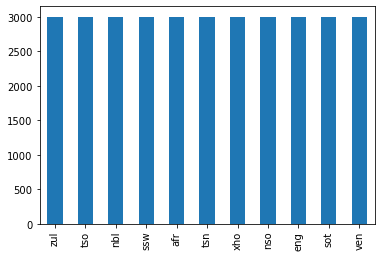

In [15]:
df.lang_id.value_counts()
df['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

In [16]:
#Clean train dataset
df_clean =clean_data(df)

In [17]:
#Clean train dataset
test_clean =clean_data(test)

## Model pipelines

In [26]:
X = df['text'].str.join(' ')
y= df['lang_id']

X_testf = test['text'].str.join(' ')

In [19]:
#Creating a training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [20]:
#SGD Classifiers
SGD_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'char', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,3)
                            )),('SGD', SGDClassifier()),])

#SVC Classifiers
svc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'char', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,3)
                            )),('SVC', SVC()),])

#Naive Bayes Classifiers
naive_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'char', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,3)
                            )),('naive', MultinomialNB()),])



##  Model Classifiers

In [21]:
## SGD
SGD_count.fit(X_train,y_train)
 

Pipeline(steps=[('CountVec',
                 CountVectorizer(analyzer='char', max_features=180000,
                                 ngram_range=(1, 3))),
                ('SGD', SGDClassifier())])

In [22]:
svc_count.fit(X_train,y_train)

Pipeline(steps=[('CountVec',
                 CountVectorizer(analyzer='char', max_features=180000,
                                 ngram_range=(1, 3))),
                ('SVC', SVC())])

In [23]:
naive_count.fit(X_train,y_train)


Pipeline(steps=[('CountVec',
                 CountVectorizer(analyzer='char', max_features=180000,
                                 ngram_range=(1, 3))),
                ('naive', MultinomialNB())])

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       281
         eng       0.99      1.00      1.00       297
         nbl       0.96      0.92      0.94       327
         nso       1.00      0.99      1.00       322
         sot       1.00      0.95      0.98       307
         ssw       1.00      0.98      0.99       286
         tsn       0.95      1.00      0.97       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.97      0.93      0.95       313
         zul       0.86      0.96      0.91       295

    accuracy                           0.97      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.97      0.97      3300



Text(0.5, 1.0, 'Confusion Matrix for SGD Classifier with Count Vectorizer')

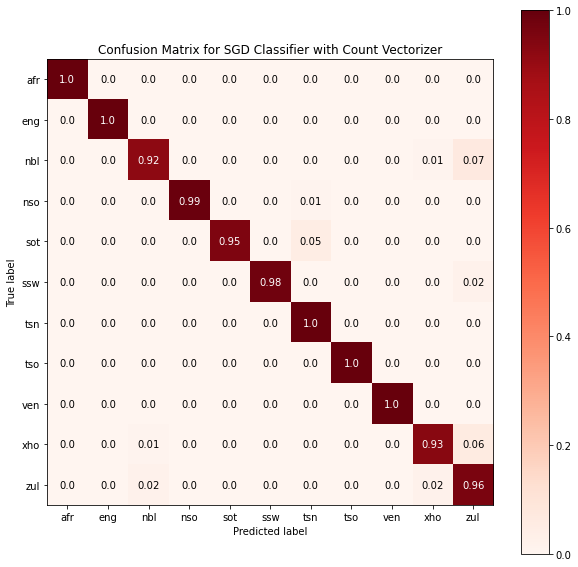

In [24]:
print(classification_report(y_test,SGD_count.predict(X_test)))
plot_confusion_matrix(y_test,SGD_count.predict(X_test),normalize=True, figsize=(10,10),cmap=("Reds"))
plt.title("Confusion Matrix for SGD Classifier with Count Vectorizer")

In [27]:
test['lang_id'] = SGD_count.predict(X_testf)
test[['index','lang_id']].to_csv("submission1.csv",index=False)




In [ ]:

test['lang_id'] = svc_count.predict(X_testf)
test[['index','lang_id']].to_csv("submission2.csv",index=False)

In [ ]:
test['lang_id'] = naive_count.predict(X_testf)
test[['index','lang_id']].to_csv("submission3.csv",index=False)